<Axes: >

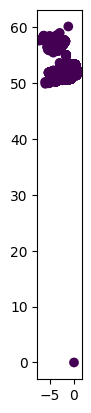

In [1]:
import pandas as pd
import numpy as np
import geopandas


df = geopandas.read_parquet(
    "s3://weave.energy/smart-meter", 
    filters=[("data_collection_log_timestamp", "==", pd.Timestamp("2024-07-14T20:00:00Z"))])

df = df[df["total_consumption_active_import"] > 200]

df.plot(column="total_consumption_active_import")

In [2]:
df.head()

,dataset_id,dno_alias,aggregated_device_count_active,total_consumption_active_import,data_collection_log_timestamp,geometry,secondary_substation_unique_id,lv_feeder_unique_id
0,NGED_110191_11_Jul_2024,NGED,26.0,7693.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-11
1,NGED_110191_21_Jul_2024,NGED,28.0,4135.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-21
2,NGED_110191_22_Jul_2024,NGED,11.0,1920.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-22
3,NGED_110191_31_Jul_2024,NGED,23.0,4547.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-31
4,NGED_110191_42_Jul_2024,NGED,24.0,3412.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-42


In [8]:
df['dno_alias'].value_counts()

dno_alias
SSEN    60567
NGED    22520
Name: count, dtype: int64

In [11]:
df['lv_feeder_unique_id'].value_counts()

lv_feeder_unique_id
SSEN-890009900501    1
NGED-110191-11       1
NGED-110191-21       1
NGED-110191-22       1
NGED-110191-31       1
                    ..
NGED-110362-31       1
NGED-110362-21       1
NGED-110362-11       1
NGED-110360-41       1
NGED-110360-31       1
Name: count, Length: 83087, dtype: int64

In [10]:
df[df['lv_feeder_unique_id'] == 'NGED-110191-11']

,dataset_id,dno_alias,aggregated_device_count_active,total_consumption_active_import,data_collection_log_timestamp,geometry,secondary_substation_unique_id,lv_feeder_unique_id
0,NGED_110191_11_Jul_2024,NGED,26.0,7693.0,2024-07-14 20:00:00+00:00,POINT (-2.5715 51.4262),NGED-110191,NGED-110191-11


In [12]:
df['secondary_substation_unique_id'].value_counts()

secondary_substation_unique_id
SSEN-2818002020    10
SSEN-8077001005    10
SSEN-6112004041     9
SSEN-0150006060     9
SSEN-1916007240     9
                   ..
SSEN-8222001005     1
SSEN-3128004150     1
SSEN-8196001005     1
SSEN-8187006010     1
NGED-110840         1
Name: count, Length: 35963, dtype: int64